In [1]:
# eda of nyc tickets data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data
data = pd.read_csv('../data/2014.csv', skiprows=lambda i: i>0 and np.random.rand() > 0.01)

# check data
print(data.head())
print(data.info())
print(data.describe())

# check for missing values
print(data.isnull().sum())

# check for duplicates
print(data.duplicated().sum())

# # drop duplicates
# data.drop_duplicates(inplace=True)

# # drop columns with missing values
# data.dropna(axis=1, inplace=True)


   Summons Number Plate ID Registration State Plate Type  Issue Date  \
0      1363267309  52964MD                 NY        COM  04/24/2000   
1      1350167472  GGF4256                 NY        PAS  07/27/2000   
2      1359243240   XR458W                 NJ        PAS  09/23/2000   
3      1360467970  49715JG                 99        PAS  12/26/2000   
4      1353905317   XN378A                 NJ        PAS  01/10/2010   

   Violation Code Vehicle Body Type Vehicle Make Issuing Agency  Street Code1  \
0              19               VAN        FRUEH              P         13610   
1              14              SUBN        CHEVR              P         72630   
2              45              DELV         FORD              P         34930   
3              20               VAN          NaN              P         30790   
4              18               VAN         FORD              P         10110   

   ...  Vehicle Color  Unregistered Vehicle?  Vehicle Year  Meter Number  \
0  .

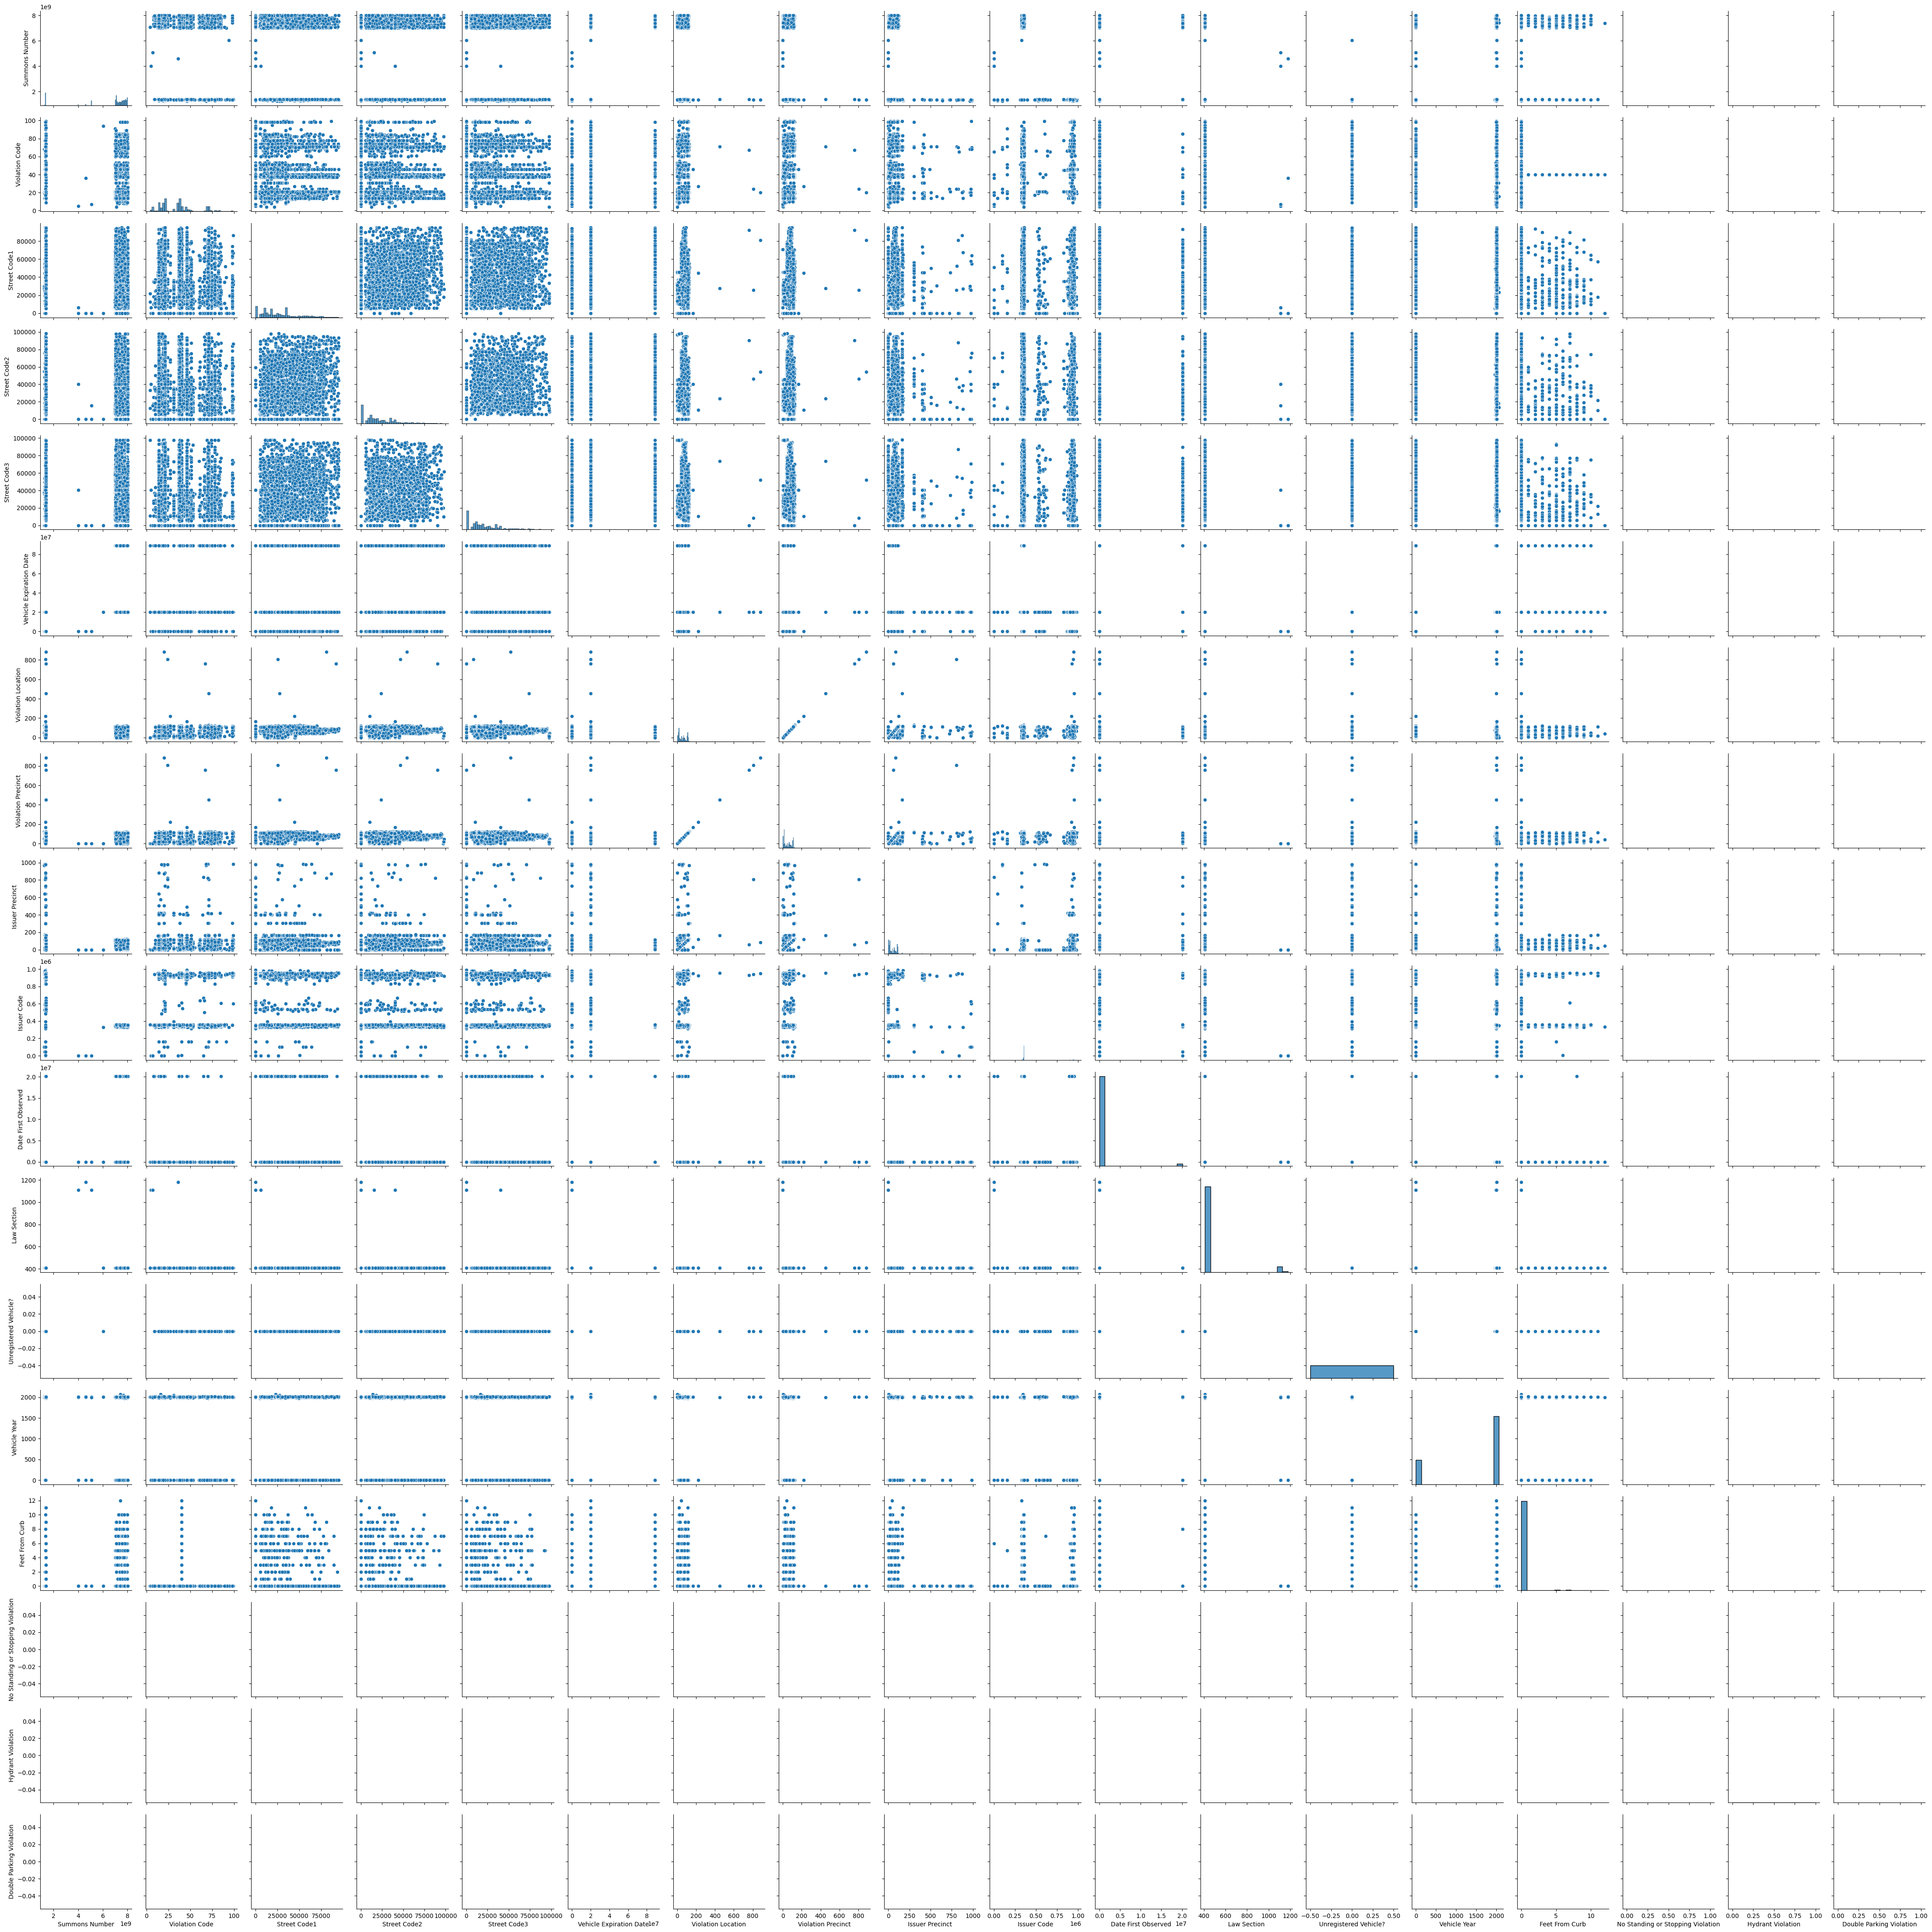

In [2]:
cols = ['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'Number', 'Street',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation']

# eda
sns.pairplot(data[cols])
plt.show()


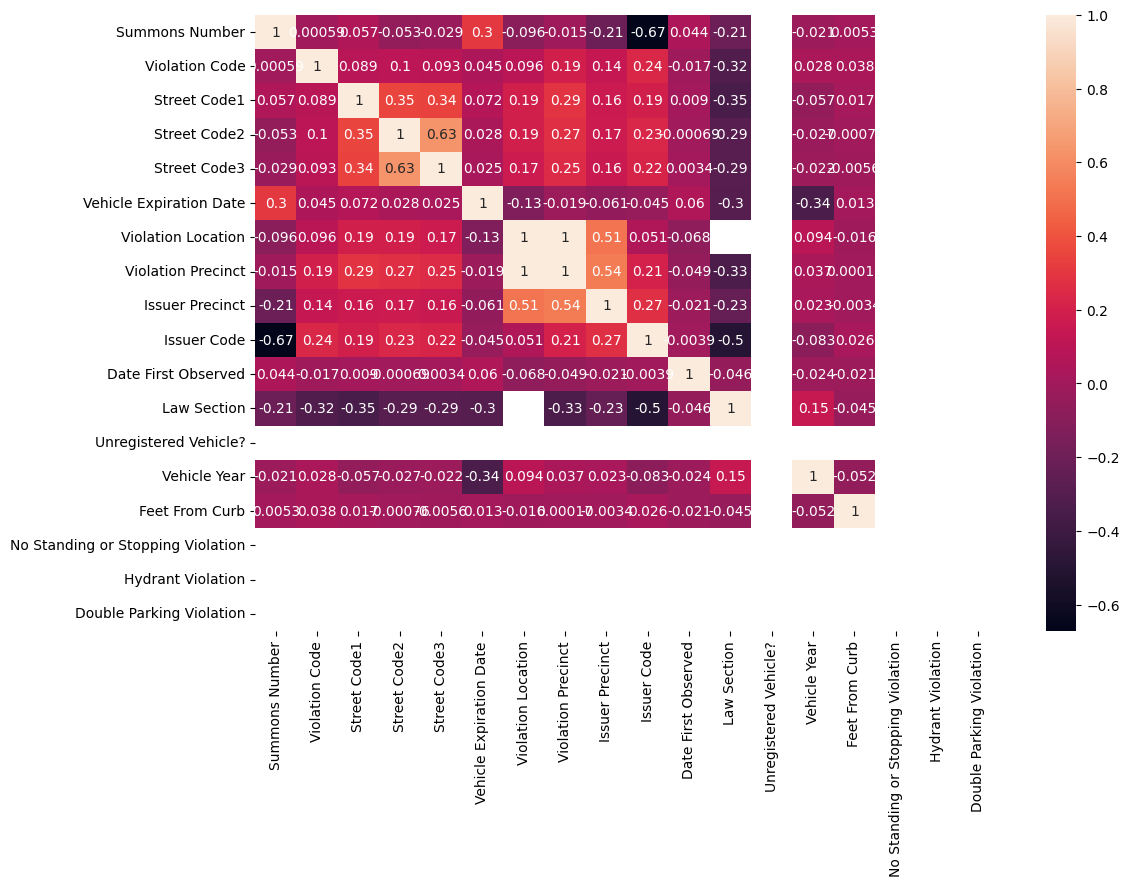

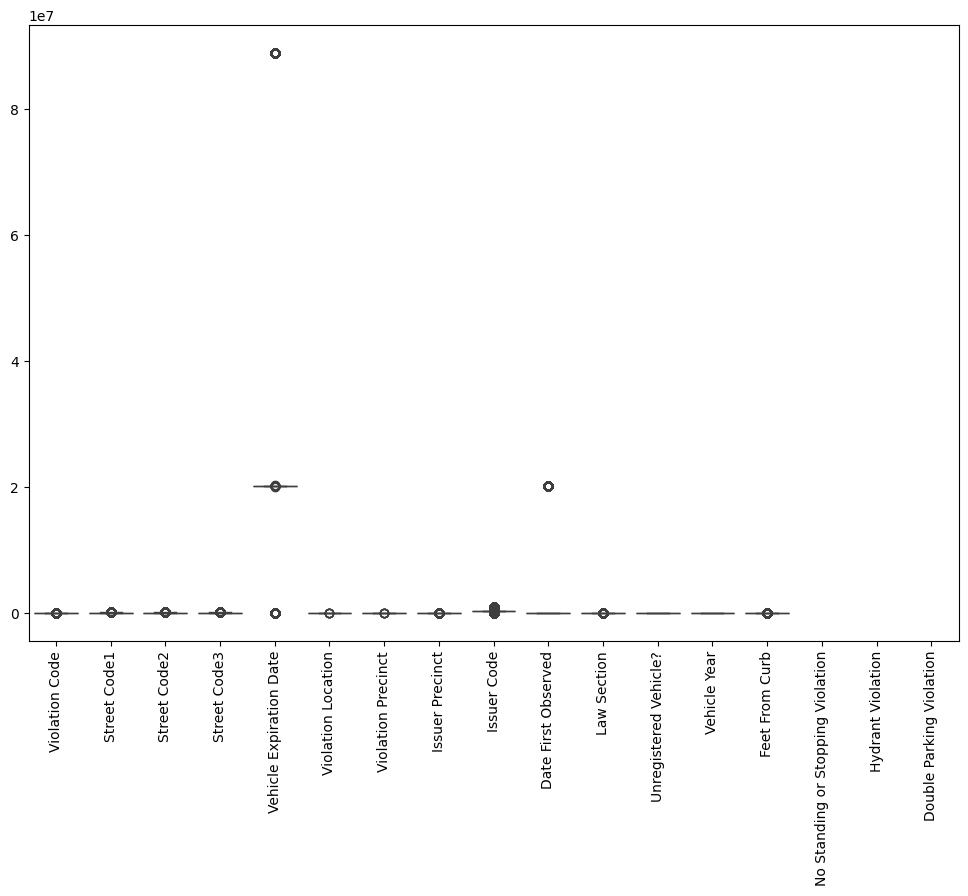

In [5]:

# correlation
plt.figure(figsize=(12, 8))
# numeric columns
col_num = data.select_dtypes(include=np.number).columns
sns.heatmap(data[col_num].corr(), annot=True)
plt.show()

# check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[cols[1:]])
plt.xticks(rotation=90)
plt.show()


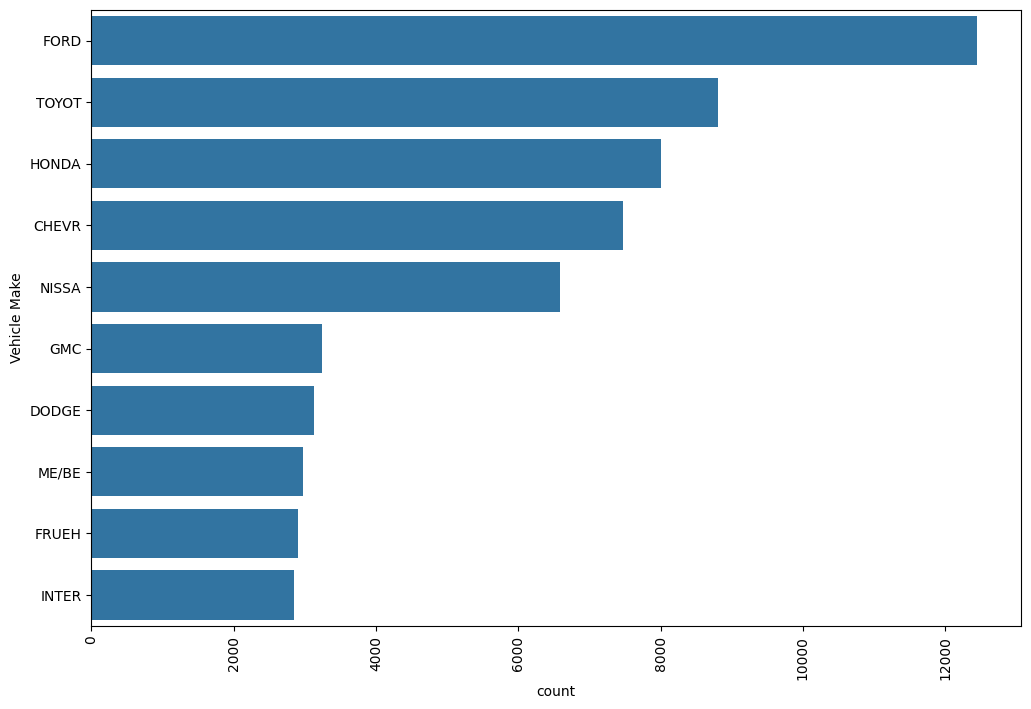

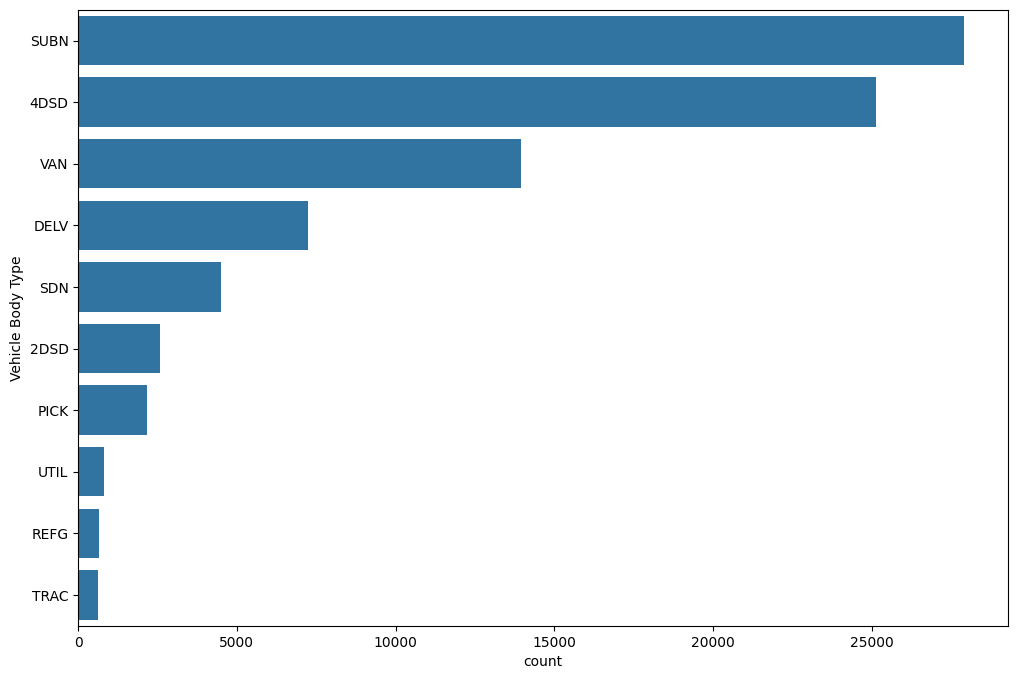

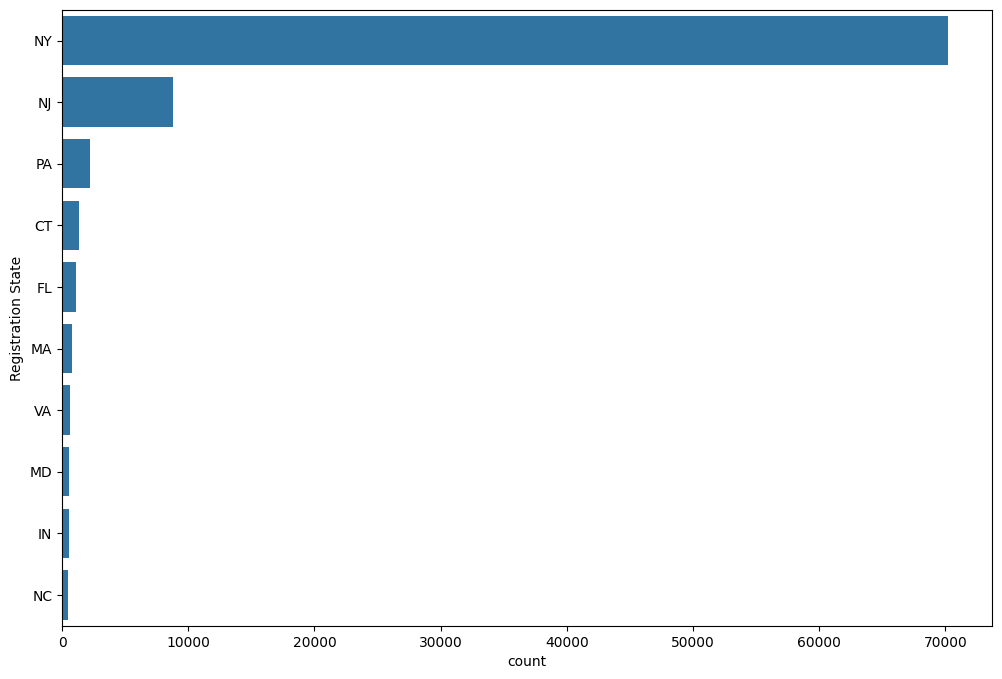

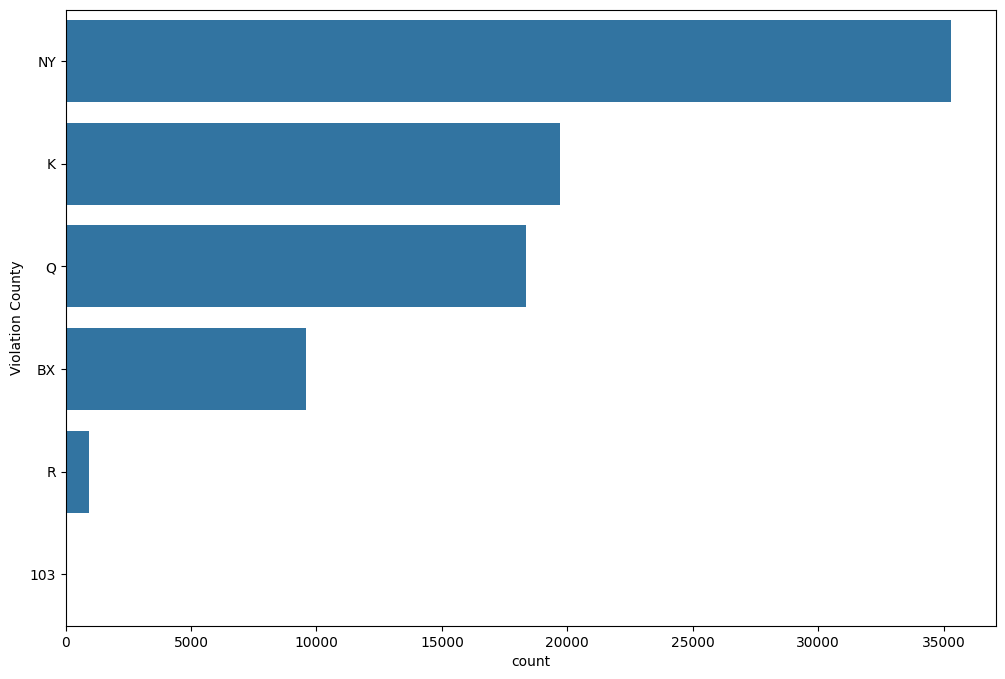

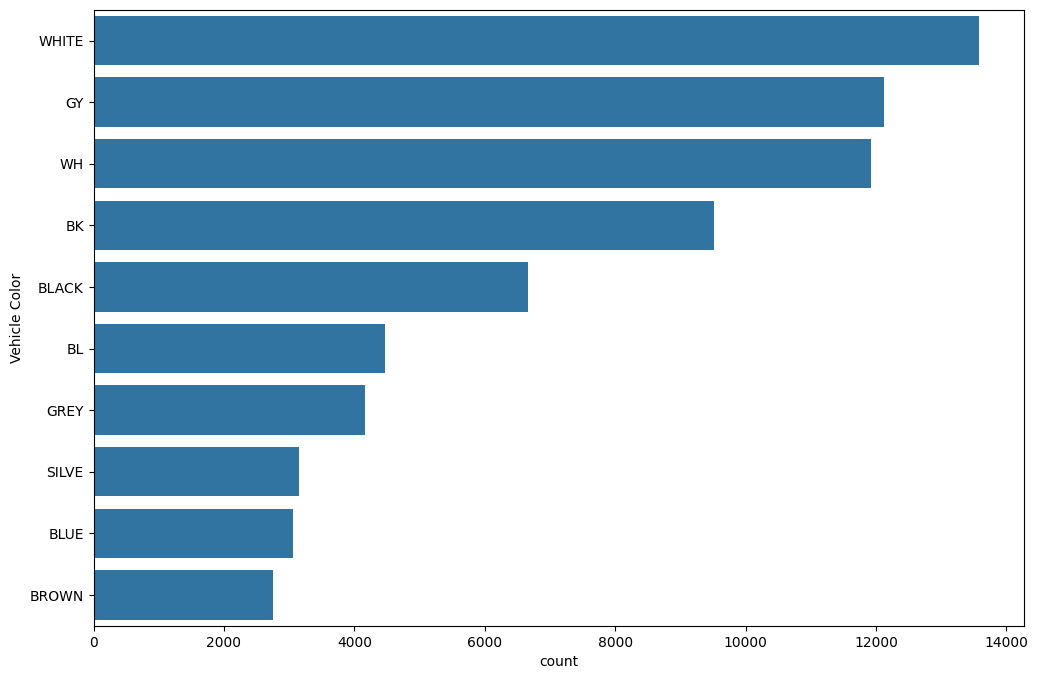

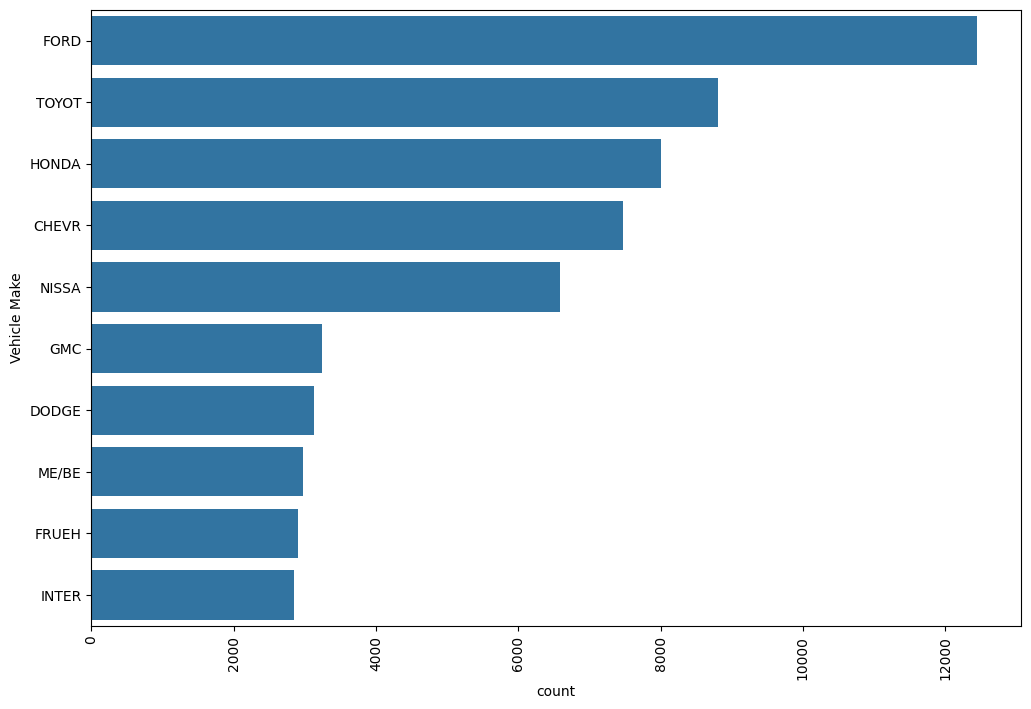

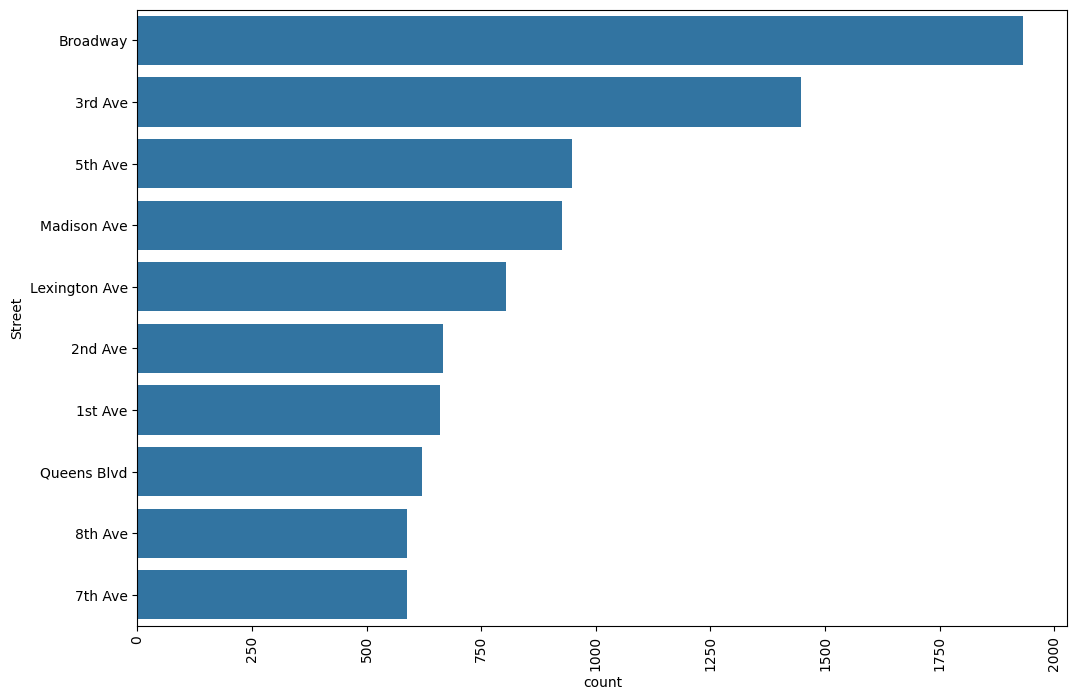

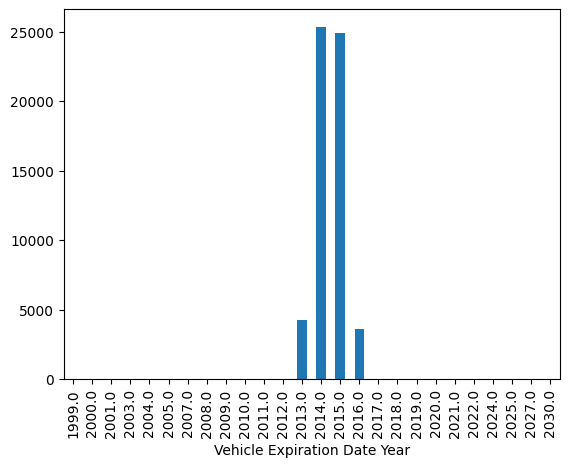

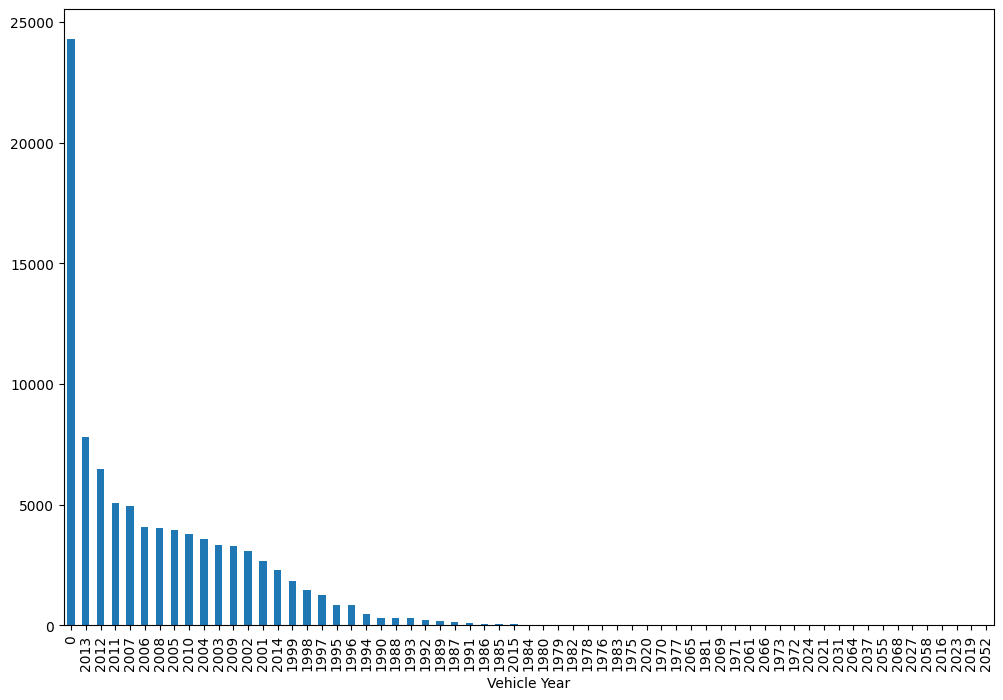

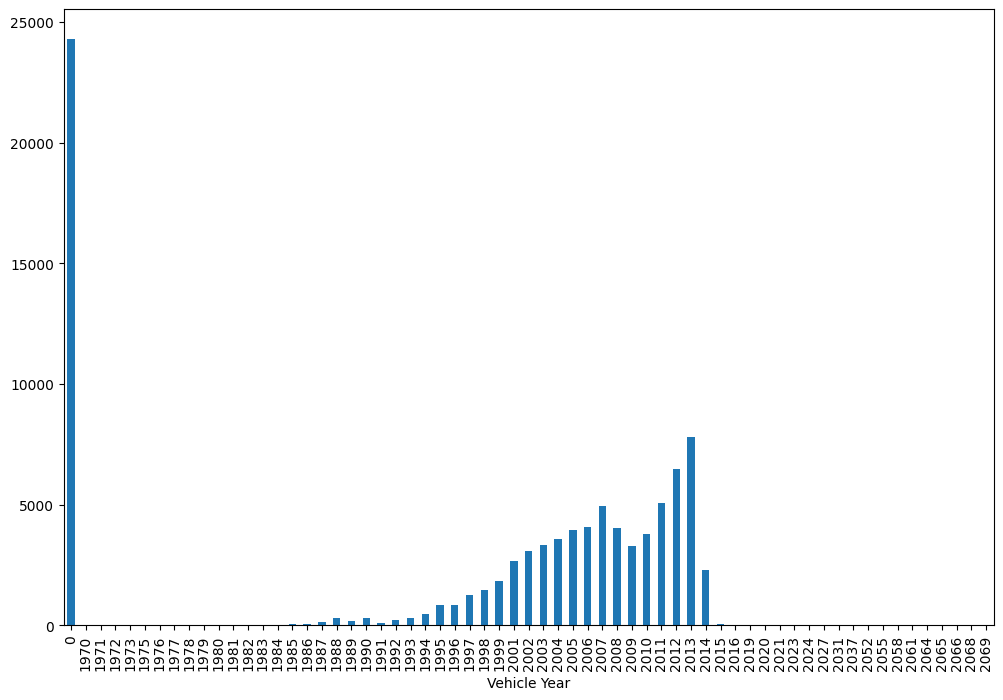

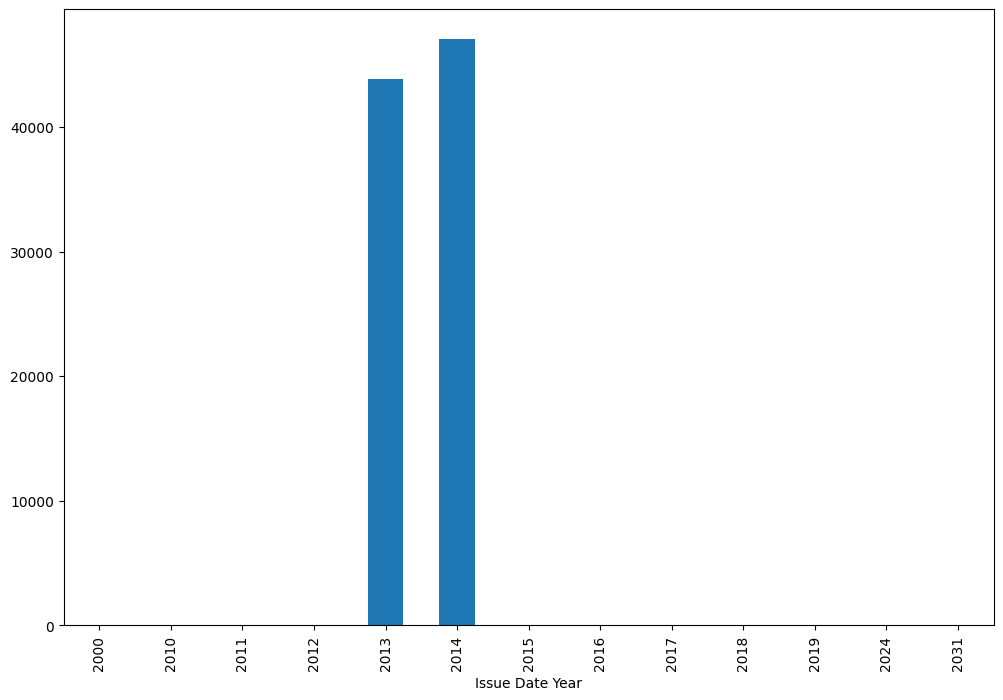

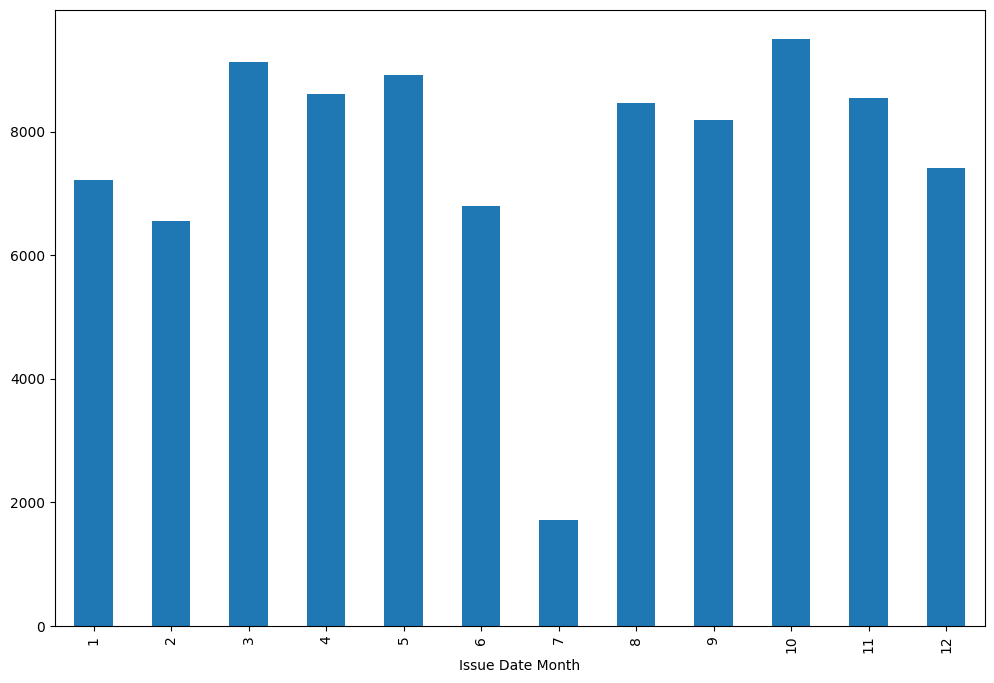

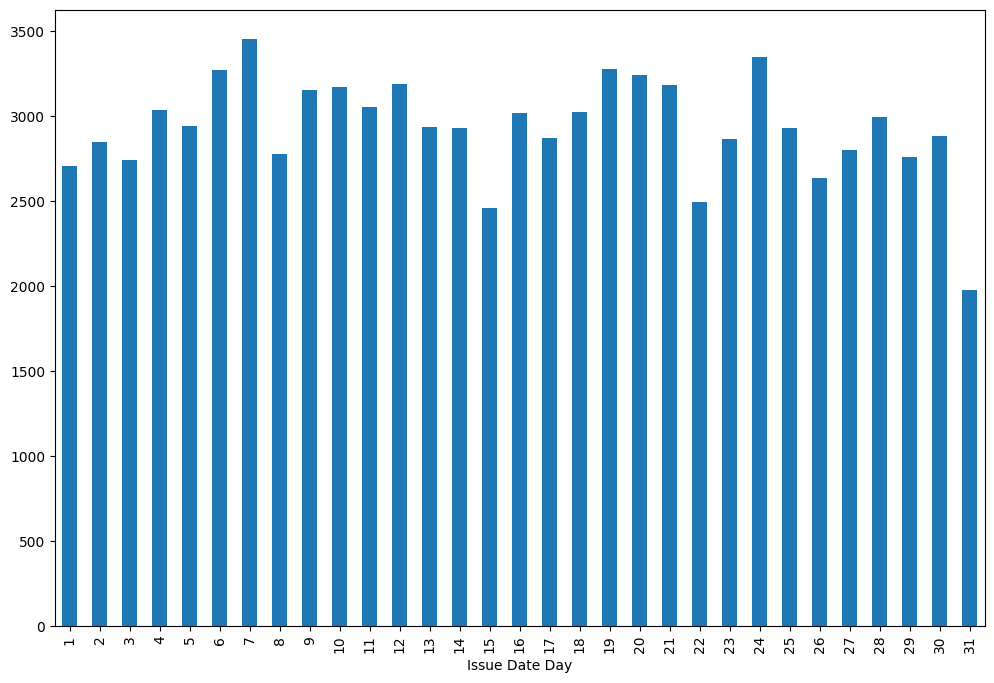

In [2]:

plt.figure(figsize=(12, 8))
sns.countplot(data['Vehicle Make'], order=data['Vehicle Make'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

# check for class imbalance
plt.figure(figsize=(12, 8))
sns.countplot(data['Vehicle Body Type'], order=data['Vehicle Body Type'].value_counts().index[:10])
plt.show()

# number of vaiolations by reg state
plt.figure(figsize=(12, 8))
sns.countplot(data['Registration State'], order=data['Registration State'].value_counts().index[:10])
plt.show()

# number of vaiolations by county
plt.figure(figsize=(12, 8))
sns.countplot(data['Violation County'], order=data['Violation County'].value_counts().index[:10])
plt.show()

# number of vaiolations by color
plt.figure(figsize=(12, 8))
sns.countplot(data['Vehicle Color'], order=data['Vehicle Color'].value_counts().index[:10])
plt.show()

# number of vaiolations by make
plt.figure(figsize=(12, 8))
sns.countplot(data['Vehicle Make'], order=data['Vehicle Make'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

# top10 street with most violations
plt.figure(figsize=(12, 8))
sns.countplot(data['Street'], order=data['Street'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

# number of vaiolations by vehicle exp date: exmpl: 20140728
data['Vehicle Expiration Date'] = pd.to_datetime(data['Vehicle Expiration Date'], format='%Y%m%d', errors='coerce')
data['Vehicle Expiration Date Year'] = data['Vehicle Expiration Date'].dt.year
data['Vehicle Expiration Date Month'] = data['Vehicle Expiration Date'].dt.month
data['Vehicle Expiration Date Day'] = data['Vehicle Expiration Date'].dt.day

data.groupby('Vehicle Expiration Date Year').size().plot(kind='bar')
plt.show()

# number of vaiolations by vehicle year
plt.figure(figsize=(12, 8))
data['Vehicle Year'].value_counts().plot(kind='bar')
plt.show()
# order by year
plt.figure(figsize=(12, 8))
data['Vehicle Year'].value_counts().sort_index().plot(kind='bar')
plt.show()

# number of vaiolations by issue date - year, month, day - exp.: 12/18/1970
data['Issue Date'] = pd.to_datetime(data['Issue Date'])
data['Issue Date Year'] = data['Issue Date'].dt.year
data['Issue Date Month'] = data['Issue Date'].dt.month
data['Issue Date Day'] = data['Issue Date'].dt.day

plt.figure(figsize=(12, 8))
data.groupby('Issue Date Year').size().plot(kind='bar')
plt.show()

plt.figure(figsize=(12, 8))
data.groupby('Issue Date Month').size().plot(kind='bar')
plt.show()

plt.figure(figsize=(12, 8))
data.groupby('Issue Date Day').size().plot(kind='bar')
plt.show()


In [ ]:
# Function to convert the time format
def convert_time(t):
    if type(t) != str:
        print(t)
        return t
    hour = int(t[:2])
    minute = t[2:4]
    period = t[4]
    if period == 'P' and hour != 12:
        hour += 12
    return f"{hour:02}:{minute}"

# Apply the function to the column
data['Violation Time1'] = data['Violation Time'].copy()
data['Violation Time1'] = data['Violation Time1'].apply(convert_time)

# Convert to datetime format
data['Violation Time1'] = pd.to_datetime(data['Violation Time1'], format='%H:%M')

# data['Violation Time1']

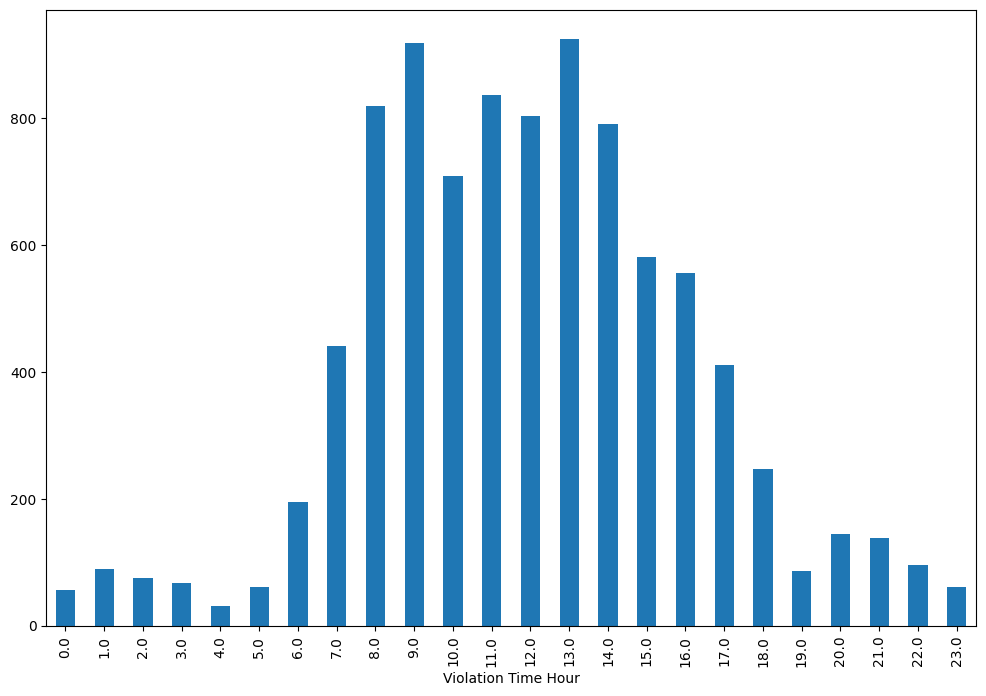

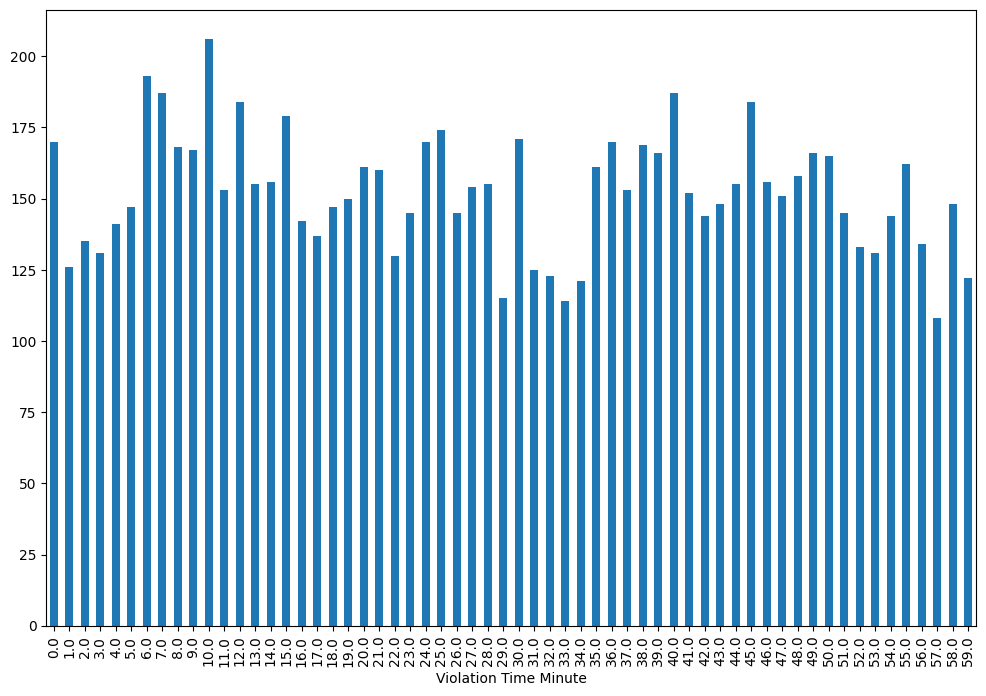

In [38]:
# violation time 
data['Violation Time Hour'] = data['Violation Time1'].dt.hour
data['Violation Time Minute'] = data['Violation Time1'].dt.minute

plt.figure(figsize=(12, 8))
data.groupby('Violation Time Hour').size().plot(kind='bar')
plt.show()

plt.figure(figsize=(12, 8))
data.groupby('Violation Time Minute').size().plot(kind='bar')
plt.show()


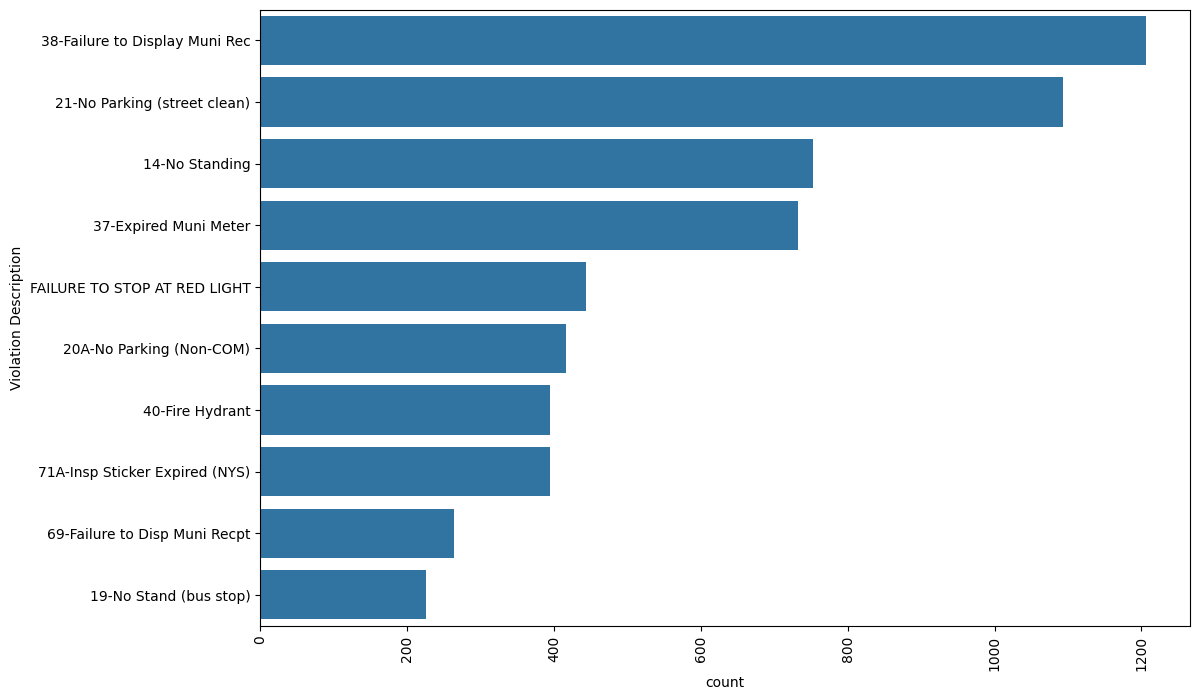

In [3]:
# Violation description
plt.figure(figsize=(12, 8))
sns.countplot(data['Violation Description'], order=data['Violation Description'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()


In [24]:
data['Issue Date1'] = pd.to_datetime(data['Issue Date'])

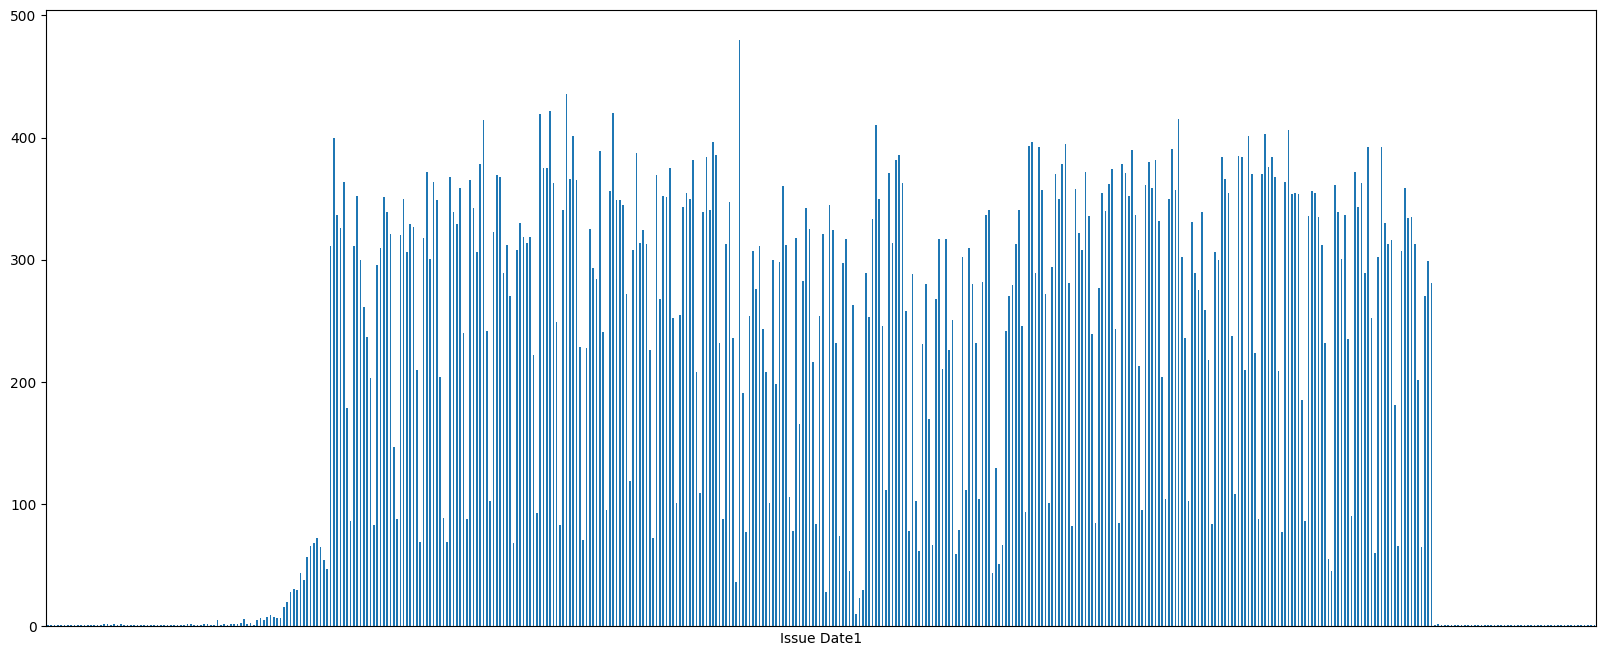

In [26]:

# number of violations for each day, order by date
plt.figure(figsize=(20, 8))
data['Issue Date1'].value_counts().sort_index().plot(kind='bar')
# no x ticks
plt.xticks([])
plt.show()

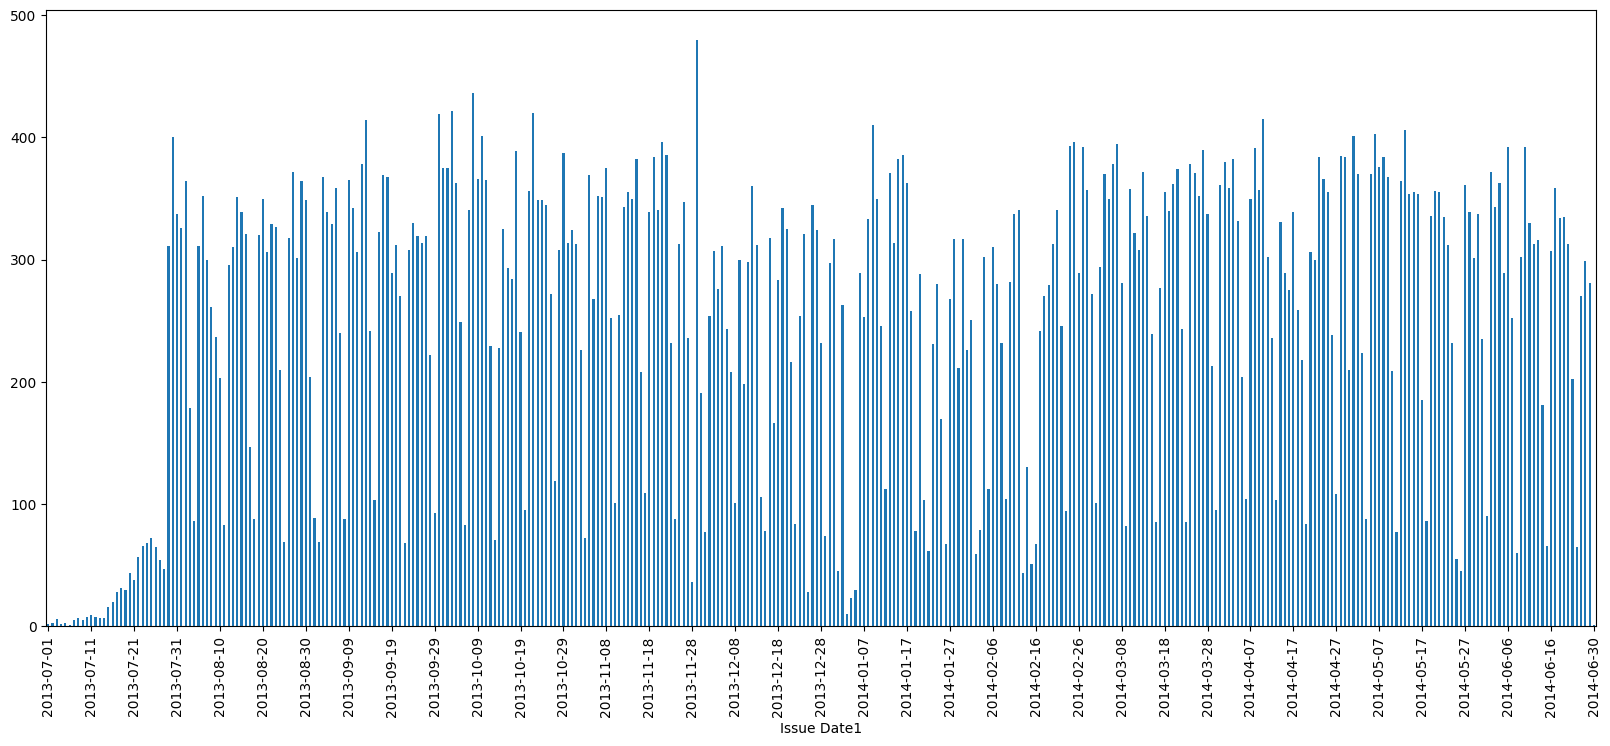

In [45]:
# Issue date between 2014-01-01 and 2014-01-31
plt.figure(figsize=(20, 8))
d1314 = data[(data['Issue Date1'] >= '2013-07-01') & (data['Issue Date1'] <= '2014-07-01')]['Issue Date1']
dsort = d1314.value_counts().sort_index()
dsort.plot(kind='bar')
dsort.index = dsort.index.date
plt.xticks(range(0, len(dsort), 10), dsort.index[::10], rotation=90)
plt.show()